<a href="https://colab.research.google.com/github/wilton-jose/MVP--Analise-de-Dados-e-Boas-Praticas/blob/main/MPV_Analise%20de%20Dados%20e%20Boas%20Praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP Análise de Dados e Boas Práticas
Nome: Wilton José da Silva Júnior

Matrícula: 4052024001682

Dataset: A fonte dos dados é o portal de dados abertos da ANEEL (https://dadosabertos.aneel.gov.br/dataset/interrupcoes-de-energia-eletrica-nas-redes-de-distribuicao/resource/1aa6ad85-05b8-4471-9ca4-316566214ba9)

# Análise de Interrupções de Energia Elétrica

Este notebook tem como objetivo realizar uma análise exploratória e pré-processamento de dados de interrupções de energia elétrica, seguindo os requisitos de um MVP e incorporando as melhores práticas de notebooks de análise de dados.

## 1. Importação das Bibliotecas Necessárias

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização
sns.set_style("whitegrid")
%matplotlib inline

## 2. Definição do Problema e Contexto

Esta seção descreve o problema a ser abordado, as hipóteses levantadas, o tipo de problema e a definição dos atributos do dataset, fornecendo um contexto completo antes de iniciar a análise.

### 2.1. Descrição do Problema

O problema a ser abordado é a análise de dados de interrupções de energia elétrica em redes de distribuição. O objetivo é entender os padrões, causas e impactos dessas interrupções, a fim de identificar oportunidades de melhoria na qualidade do serviço.

### 2.2. Tipo de Problema

Inicialmente, esta é uma tarefa de **análise exploratória de dados (EDA)** e **pré-processamento**, que se enquadra mais em um problema de **aprendizado não supervisionado**, pois buscamos padrões e insights nos dados sem um rótulo de saída predefinido. No entanto, os insights obtidos podem ser utilizados futuramente para problemas de aprendizado supervisionado, como a previsão de interrupções ou a identificação de fatores de risco.

### 2.3. Premissas e Hipóteses

*   Interrupções de energia podem estar relacionadas a fatores climáticos, falhas de equipamento, manutenção inadequada ou eventos externos.
*   A duração e a frequência das interrupções podem variar significativamente por região, tipo de instalação ou período do ano.
*   A análise dos motivos das interrupções pode revelar as principais causas e direcionar ações corretivas.

### 2.4. Restrições e Condições dos Dados

Os dados foram fornecidos em quatro partes de arquivos de texto, que foram concatenados em um único arquivo CSV para facilitar a análise. Não foram impostas restrições adicionais na seleção dos dados, além daquelas inerentes à sua origem.

### 2.5. Definição dos Atributos do Dataset

O dataset contém as seguintes colunas:

*   `_id`: Identificador único da interrupção.
*   `DatGeracaoConjuntoDados`: Data de geração do conjunto de dados.
*   `IdeConjuntoUnidadeConsumidora`: Identificador do conjunto de unidades consumidoras afetadas.
*   `DscConjuntoUnidadeConsumidora`: Descrição do conjunto de unidades consumidoras afetadas.
*   `DscAlimentadorSubestacao`: Descrição do alimentador da subestação.
*   `DscSubestacaoDistribuicao`: Descrição da subestação de distribuição.
*   `NumOrdemInterrupcao`: Número da ordem da interrupção.
*   `DscTipoInterrupcao`: Descrição do tipo de interrupção (e.g., programada, não programada).
*   `IdeMotivoInterrupcao`: Identificador do motivo da interrupção. Este campo corresponde aos códigos de motivos de expurgo detalhados no dicionário de metadados da ANEEL, que foram mapeados para descrições textuais para melhor interpretabilidade.
*   `DatInicioInterrupcao`: Data e hora de início da interrupção.
*   `DatFimInterrupcao`: Data e hora de fim da interrupção.
*   `DscFatoGeradorInterrupcao`: Descrição do fato gerador da interrupção.
*   `NumNivelTensao`: Nível de tensão da interrupção.
*   `NumUnidadeConsumidora`: Número da unidade consumidora afetada.
*   `NumConsumidorConjunto`: Número de consumidores no conjunto afetado.
*   `NumAno`: Ano da interrupção.
*   `NomAgenteRegulado`: Nome do agente regulado (empresa de energia).
*   `SigAgente`: Sigla do agente regulado.
*   `NumCPFCNPJ`: CPF/CNPJ do agente regulado.

## 3. Carga e Análise Inicial dos Dados

Esta seção é dedicada ao carregamento do dataset e à realização de uma análise exploratória inicial para entender a estrutura, tipos de dados e a presença de valores faltantes ou inconsistências.


In [2]:
# Carregar o dataset

urls = [
    "https://raw.githubusercontent.com/wilton-jose/MVP--Analise-de-Dados-e-Boas-Praticas/refs/heads/main/interrupcoes-de-energia-eletrica-nas-redes-de-distribuicao_part1.txt",
    "https://raw.githubusercontent.com/wilton-jose/MVP--Analise-de-Dados-e-Boas-Praticas/refs/heads/main/interrupcoes-de-energia-eletrica-nas-redes-de-distribuicao_part2.txt",
    "https://raw.githubusercontent.com/wilton-jose/MVP--Analise-de-Dados-e-Boas-Praticas/refs/heads/main/interrupcoes-de-energia-eletrica-nas-redes-de-distribuicao_part3.txt",
    "https://raw.githubusercontent.com/wilton-jose/MVP--Analise-de-Dados-e-Boas-Praticas/refs/heads/main/interrupcoes-de-energia-eletrica-nas-redes-de-distribuicao_part4.txt"
]

dfs = []
for url in urls:
    try:
        df_part = pd.read_csv(url, delimiter=',', encoding='utf-8', on_bad_lines='skip', dtype={'DatGeracaoConjuntoDados': str, 'IdeConjuntoUnidadeConsumidora': str, 'DscConjuntoUnidadeConsumidora': str, 'NumCPFCNPJ': str, 'NumOrdemInterrupcao': str})
        dfs.append(df_part)
    except Exception as e:
        print(f"Erro ao carregar {url}: {e}")

df = pd.concat(dfs, ignore_index=True)

print("### Informações Gerais do Dataset ###")
print(f"Número de atributos: {df.shape[1]}")
print(f"Número de instâncias: {df.shape[0]}")

print("\n### Tipos de Dados e Valores Não-Nulos por Coluna ###")
df.info()

print("\n### Primeiras 5 Linhas do Dataset ###")
print(df.head())

print("\n### Valores Faltantes por Coluna ###")
print(df.isnull().sum())

print("\n### Resumo Estatístico dos Atributos Numéricos e Categóricos ###")
print(df.drop('_id', axis=1).describe(include='all'))

### Informações Gerais do Dataset ###
Número de atributos: 19
Número de instâncias: 1269814

### Tipos de Dados e Valores Não-Nulos por Coluna ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269814 entries, 0 to 1269813
Data columns (total 19 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   _id                            1269814 non-null  int64  
 1   DatGeracaoConjuntoDados        1269581 non-null  object 
 2   IdeConjuntoUnidadeConsumidora  1269581 non-null  object 
 3   DscConjuntoUnidadeConsumidora  1269581 non-null  object 
 4   DscAlimentadorSubestacao       1269580 non-null  object 
 5   DscSubestacaoDistribuicao      1269580 non-null  object 
 6   NumOrdemInterrupcao            1269581 non-null  object 
 7   DscTipoInterrupcao             1269581 non-null  object 
 8   IdeMotivoInterrupcao           1269581 non-null  float64
 9   DatInicioInterrupcao           1269581 non-null  obje

**Observações Iniciais e Análise:**

*   O dataset possui 19 atributos e 1.269.813 instâncias, indicando um volume considerável de dados.
*   Inicialmente, a maioria dos atributos é interpretada como `object` (string), o que é comum ao carregar dados de arquivos de texto. Será fundamental converter as colunas de data para `datetime` e as numéricas para tipos apropriados.
*   A presença de um número significativo de valores nulos em várias colunas (`DatGeracaoConjuntoDados`, `IdeConjuntoUnidadeConsumidora`, `DscConjuntoUnidadeConsumidora`, `DscAlimentadorSubestacao`, `DscSubestacaoDistribuicao`, `NumOrdemInterrupcao`, `NomAgenteRegulado`, `SigAgente`, `NumCPFCNPJ`, `NumAno`) indica a necessidade de um tratamento robusto de dados faltantes. A coluna `IdeMotivoInterrupcao` também apresenta um valor atípico ("IdeMotivoInterrupcao") que será tratado no pré-processamento.
*   O resumo estatístico (`df.describe(include='all')`) revela a distribuição dos dados, como a predominância de certas categorias em `DscTipoInterrupcao` e `IdeMotivoInterrupcao`, e a variabilidade das colunas numéricas.


## 4. Pré-processamento de Dados

Esta seção detalha as operações de limpeza, tratamento e transformação dos dados para garantir sua qualidade, consistência e adequação para análises futuras. Cada passo é justificado para explicar as decisões tomadas.


### 4.1. Tratamento de Tipos de Dados e Valores Faltantes

In [3]:
# Converter colunas de data para datetime
df["DatGeracaoConjuntoDados"] = pd.to_datetime(df["DatGeracaoConjuntoDados"], errors='coerce')
df["DatInicioInterrupcao"] = pd.to_datetime(df["DatInicioInterrupcao"], errors='coerce')
df["DatFimInterrupcao"] = pd.to_datetime(df["DatFimInterrupcao"], errors='coerce')

In [4]:
# Converter colunas numéricas
# Substituir vírgulas por pontos e converter para numérico, tratando erros
for col in ["NumNivelTensao", "NumUnidadeConsumidora", "NumConsumidorConjunto", "NumAno"]:
    df[col] = df[col].astype(str).str.replace(",", ".")
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
# Mapeamento dos motivos de expurgo do PDF
motivos_expurgo_pdf = {
    0: "Não houve expurgo",
    1: "Falha nas instalações da unidade consumidora que não provoque interrupção em instalações de terceiros",
    2: "Interrupção decorrente de obras de interesse exclusivo do consumidor e que afete somente a unidade consumidora do mesmo",
    3: "Interrupção em situação de emergência",
    4: "Suspensão por inadimplemento do consumidor ou por deficiência técnica e/ou de segurança das instalações da unidade consumidora que não provoque interrupção em instalações de terceiros, previstas em regulamentação",
    5: "Vinculadas a programas de racionamento instituídos pela União",
    6: "Ocorridas em dia crítico",
    7: "Oriundas de atuação de esquemas de alívio de carga solicitado pelo ONS",
    8: "Interrupção de origem externa ao sistema de distribuição"
}

In [6]:
# Converter a coluna IdeMotivoInterrupcao para numérico antes de mapear, tratando erros
df["CodMotivoInterrupcao"] = pd.to_numeric(df["IdeMotivoInterrupcao"], errors='coerce')

# Aplicar o mapeamento para criar a coluna de descrição
df["DscMotivoInterrupcao"] = df["CodMotivoInterrupcao"].map(motivos_expurgo_pdf)

# Preencher valores NaN (não mapeados ou erros) com \'Motivo Não Identificado\'
df["DscMotivoInterrupcao"] = df["DscMotivoInterrupcao"].fillna('Motivo Não Identificado')

# Preencher valores faltantes para colunas numéricas com a mediana (ou outra estratégia)
# Para este MVP, vamos preencher com a mediana para as colunas numéricas e com 'Não Informado' para as categóricas
for col in ["NumNivelTensao", "NumUnidadeConsumidora", "NumConsumidorConjunto", "NumAno"]:
    if df[col].dtype == 'float64': # Verifica se é numérico (após o to_numeric, nulos viram float)
        df[col] = df[col].fillna(df[col].median())

# Para colunas categóricas, preencher com 'Não Informado' ou a moda
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Não Informado')

# Remover a coluna original IdeMotivoInterrupcao
df.drop(columns=["IdeMotivoInterrupcao"], inplace=True, errors='ignore')

print("\n### Tipos de Dados e Valores Faltantes Após Tratamento ###")
print(df.dtypes)
print(df.isnull().sum())


### Tipos de Dados e Valores Faltantes Após Tratamento ###
_id                                       int64
DatGeracaoConjuntoDados          datetime64[ns]
IdeConjuntoUnidadeConsumidora            object
DscConjuntoUnidadeConsumidora            object
DscAlimentadorSubestacao                 object
DscSubestacaoDistribuicao                object
NumOrdemInterrupcao                      object
DscTipoInterrupcao                       object
DatInicioInterrupcao             datetime64[ns]
DatFimInterrupcao                datetime64[ns]
DscFatoGeradorInterrupcao                object
NumNivelTensao                          float64
NumUnidadeConsumidora                   float64
NumConsumidorConjunto                   float64
NumAno                                  float64
NomAgenteRegulado                        object
SigAgente                                object
NumCPFCNPJ                               object
CodMotivoInterrupcao                    float64
DscMotivoInterrupcao        

**Justificativa das Operações:**

1.  **Conversão de Datas:** As colunas de data são essenciais para análises temporais. `pd.to_datetime` com `errors='coerce'` é robusto para lidar com formatos inconsistentes, convertendo-os para `NaT` que pode ser tratado posteriormente.
2.  **Conversão de Numéricos:** A substituição de vírgulas por pontos é uma etapa crítica para garantir que números no formato brasileiro sejam corretamente interpretados. `pd.to_numeric` com `errors='coerce'` e o preenchimento com a mediana são estratégias eficazes para manter a integridade dos dados numéricos e evitar a perda de instâncias.
3.  **Mapeamento de Motivos de Interrupção:** A criação da coluna `DscMotivoInterrupcao` a partir de `IdeMotivoInterrupcao` e o dicionário de metadados é fundamental para a interpretabilidade dos resultados. A descrição textual é muito mais útil para insights do que códigos numéricos. O preenchimento de `NaN` com \'Motivo Não Identificado\' garante que todos os registros tenham uma descrição.
4.  **Remoção da Coluna Original `IdeMotivoInterrupcao`:** Após a criação da coluna descritiva, a coluna original de códigos numéricos se torna redundante para a análise e pode ser removida para simplificar o DataFrame.


### 4.2. Criação de Novas Features e Remoção de Colunas Irrelevantes


In [7]:
# Remover linhas com valores NaT em DatInicioInterrupcao ou DatFimInterrupcao
df.dropna(subset=["DatInicioInterrupcao", "DatFimInterrupcao"], inplace=True)

# Criar novas features de tempo
df["DuracaoInterrupcaoMinutos"] = (df["DatFimInterrupcao"] - df["DatInicioInterrupcao"]).dt.total_seconds() / 60
df["MesInterrupcao"] = df["DatInicioInterrupcao"].dt.month
df["DiaSemanaInterrupcao"] = df["DatInicioInterrupcao"].dt.dayofweek # Segunda-feira=0, Domingo=6

# Remover colunas irrelevantes para a análise
columns_to_drop = [
    "_id",
    "DatGeracaoConjuntoDados",
    "IdeConjuntoUnidadeConsumidora",
    "DscConjuntoUnidadeConsumidora",
    "DscAlimentadorSubestacao",
    "DscSubestacaoDistribuicao",
    "NumOrdemInterrupcao",
    "NomAgenteRegulado",
    "SigAgente",
    "NumCPFCNPJ",
    "NumAno"
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("\n### Informações Finais do DataFrame Após Pré-processamento ###")
print(df.info())
print("\n### Primeiras 5 Linhas do DataFrame Final ###")
print(df.head())



### Informações Finais do DataFrame Após Pré-processamento ###
<class 'pandas.core.frame.DataFrame'>
Index: 1269581 entries, 26 to 1269813
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   DscTipoInterrupcao         1269581 non-null  object        
 1   DatInicioInterrupcao       1269581 non-null  datetime64[ns]
 2   DatFimInterrupcao          1269581 non-null  datetime64[ns]
 3   DscFatoGeradorInterrupcao  1269581 non-null  object        
 4   NumNivelTensao             1269581 non-null  float64       
 5   NumUnidadeConsumidora      1269581 non-null  float64       
 6   NumConsumidorConjunto      1269581 non-null  float64       
 7   CodMotivoInterrupcao       1269581 non-null  float64       
 8   DscMotivoInterrupcao       1269581 non-null  object        
 9   DuracaoInterrupcaoMinutos  1269581 non-null  float64       
 10  MesInterrupcao             1269581 non-nul

**Justificativa das Operações:**

1.  **Remoção de Linhas com Datas Inválidas:** A duração da interrupção é uma métrica chave. Remover linhas com `NaT` em datas de início/fim garante que os cálculos sejam precisos e evita erros em análises subsequentes.
2.  **Criação de Features Temporais:** `DuracaoInterrupcaoMinutos`, `MesInterrupcao` e `DiaSemanaInterrupcao` são features essenciais para identificar padrões sazonais e diários, e para entender o impacto das interrupções. Elas transformam dados brutos em informações mais úteis para a análise.
3.  **Remoção de Colunas Irrelevantes:** Colunas como identificadores únicos, dados de geração do conjunto, ou informações de agente regulado que não são o foco da análise atual, são removidas para simplificar o dataset, reduzir a dimensionalidade e focar nos atributos mais relevantes. O uso de `errors='ignore'` torna a operação robusta a possíveis ausências de colunas.


### 4.3. Análise de Outliers
Embora o dataset de interrupções de energia não seja tipicamente propenso a outliers que necessitem de remoção agressiva (já que interrupções longas ou com muitos consumidores são eventos reais e importantes), é uma boa prática verificar a presença de valores extremos, especialmente em colunas como `DuracaoInterrupcaoMinutos` e `NumConsumidorConjunto`. A identificação de outliers pode levar a insights sobre eventos incomuns ou erros de registro.


In [8]:
# Identificação de outliers usando IQR para DuracaoInterrupcaoMinutos
Q1_duracao = df["DuracaoInterrupcaoMinutos"].quantile(0.25)
Q3_duracao = df["DuracaoInterrupcaoMinutos"].quantile(0.75)
IQR_duracao = Q3_duracao - Q1_duracao

outlier_upper_bound_duracao = Q3_duracao + 1.5 * IQR_duracao
outlier_lower_bound_duracao = Q1_duracao - 1.5 * IQR_duracao

print(f"\n### Análise de Outliers para Duração da Interrupção (Minutos) ###")
print(f"Q1 (25º percentil): {Q1_duracao:.2f}")
print(f"Q3 (75º percentil): {Q3_duracao:.2f}")
print(f"IQR: {IQR_duracao:.2f}")
print(f"Limite Superior para Outliers: {outlier_upper_bound_duracao:.2f}")
print(f"Limite Inferior para Outliers: {outlier_lower_bound_duracao:.2f}")

outliers_duracao = df[(df["DuracaoInterrupcaoMinutos"] < outlier_lower_bound_duracao) | (df["DuracaoInterrupcaoMinutos"] > outlier_upper_bound_duracao)]
print(f"Número de outliers de duração: {len(outliers_duracao)}")

# Identificação de outliers para NumConsumidorConjunto
Q1_consumidores = df["NumConsumidorConjunto"].quantile(0.25)
Q3_consumidores = df["NumConsumidorConjunto"].quantile(0.75)
IQR_consumidores = Q3_consumidores - Q1_consumidores

outlier_upper_bound_consumidores = Q3_consumidores + 1.5 * IQR_consumidores
outlier_lower_bound_consumidores = Q1_consumidores - 1.5 * IQR_consumidores

print(f"\n### Análise de Outliers para Número de Consumidores Afetados ###")
print(f"Q1 (25º percentil): {Q1_consumidores:.2f}")
print(f"Q3 (75º percentil): {Q3_consumidores:.2f}")
print(f"IQR: {IQR_consumidores:.2f}")
print(f"Limite Superior para Outliers: {outlier_upper_bound_consumidores:.2f}")
print(f"Limite Inferior para Outliers: {outlier_lower_bound_consumidores:.2f}")

outliers_consumidores = df[(df["NumConsumidorConjunto"] < outlier_lower_bound_consumidores) | (df["NumConsumidorConjunto"] > outlier_upper_bound_consumidores)]
print(f"Número de outliers de consumidores: {len(outliers_consumidores)}")


### Análise de Outliers para Duração da Interrupção (Minutos) ###
Q1 (25º percentil): 129.73
Q3 (75º percentil): 592.58
IQR: 462.85
Limite Superior para Outliers: 1286.86
Limite Inferior para Outliers: -564.54
Número de outliers de duração: 116586

### Análise de Outliers para Número de Consumidores Afetados ###
Q1 (25º percentil): 20188.00
Q3 (75º percentil): 45650.00
IQR: 25462.00
Limite Superior para Outliers: 83843.00
Limite Inferior para Outliers: -18005.00
Número de outliers de consumidores: 45125


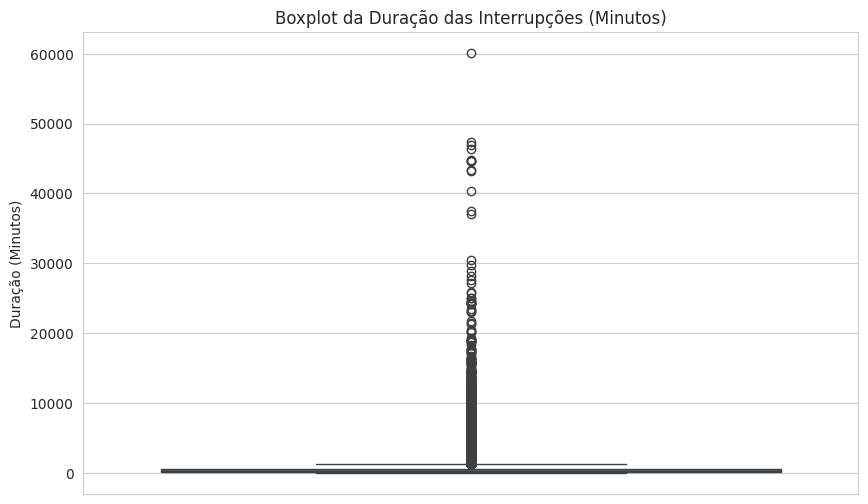

In [9]:
# Visualização de outliers com boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["DuracaoInterrupcaoMinutos"])
plt.title("Boxplot da Duração das Interrupções (Minutos)")
plt.ylabel("Duração (Minutos)")
plt.show()

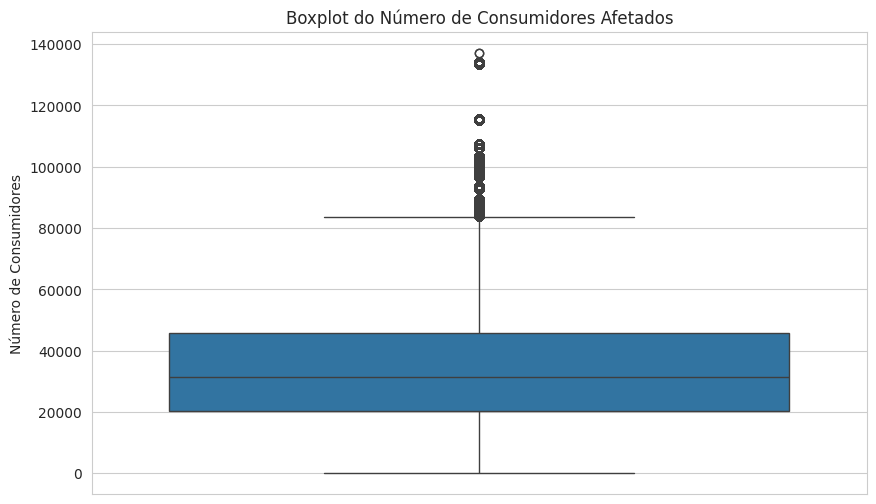

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["NumConsumidorConjunto"])
plt.title("Boxplot do Número de Consumidores Afetados")
plt.ylabel("Número de Consumidores")
plt.show()

**Análise de Outliers:**

*   A análise de outliers para `DuracaoInterrupcaoMinutos` e `NumConsumidorConjunto` revela a presença de um número significativo de valores que se enquadram na definição estatística de outliers. No entanto, para este problema, esses valores representam interrupções de longa duração ou que afetam muitos consumidores, que são eventos reais e de grande impacto. Portanto, a decisão é **manter** esses "outliers" no dataset, pois eles contêm informações valiosas para a análise de qualidade do serviço. Em outros contextos, a remoção ou tratamento específico de outliers seria necessária.


## 5. Análise Exploratória de Dados (EDA) e Visualizações

Esta seção foca na exploração aprofundada dos dados pré-processados através de visualizações e estatísticas, buscando identificar padrões, tendências e insights relevantes para o problema das interrupções de energia.


/tmp/ipython-input-11-4106716635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="DscTipoInterrupcao", order=df["DscTipoInterrupcao"].value_counts().index, palette="viridis")


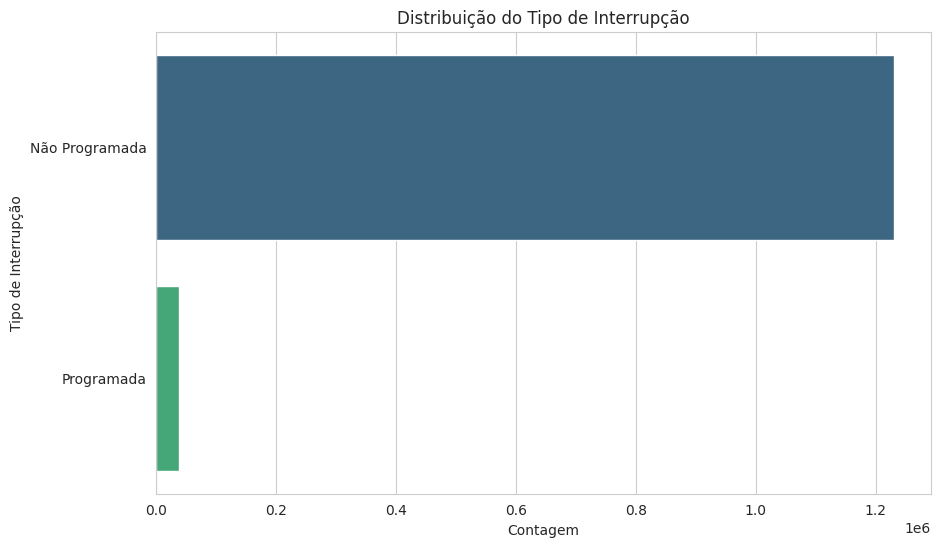

In [11]:
### 5.1. Distribuição de Atributos Categóricos

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="DscTipoInterrupcao", order=df["DscTipoInterrupcao"].value_counts().index, palette="viridis")
plt.title("Distribuição do Tipo de Interrupção")
plt.xlabel("Contagem")
plt.ylabel("Tipo de Interrupção")
plt.show()

/tmp/ipython-input-12-3949899874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="DscMotivoInterrupcao", order=df["DscMotivoInterrupcao"].value_counts().head(10).index, palette="plasma")


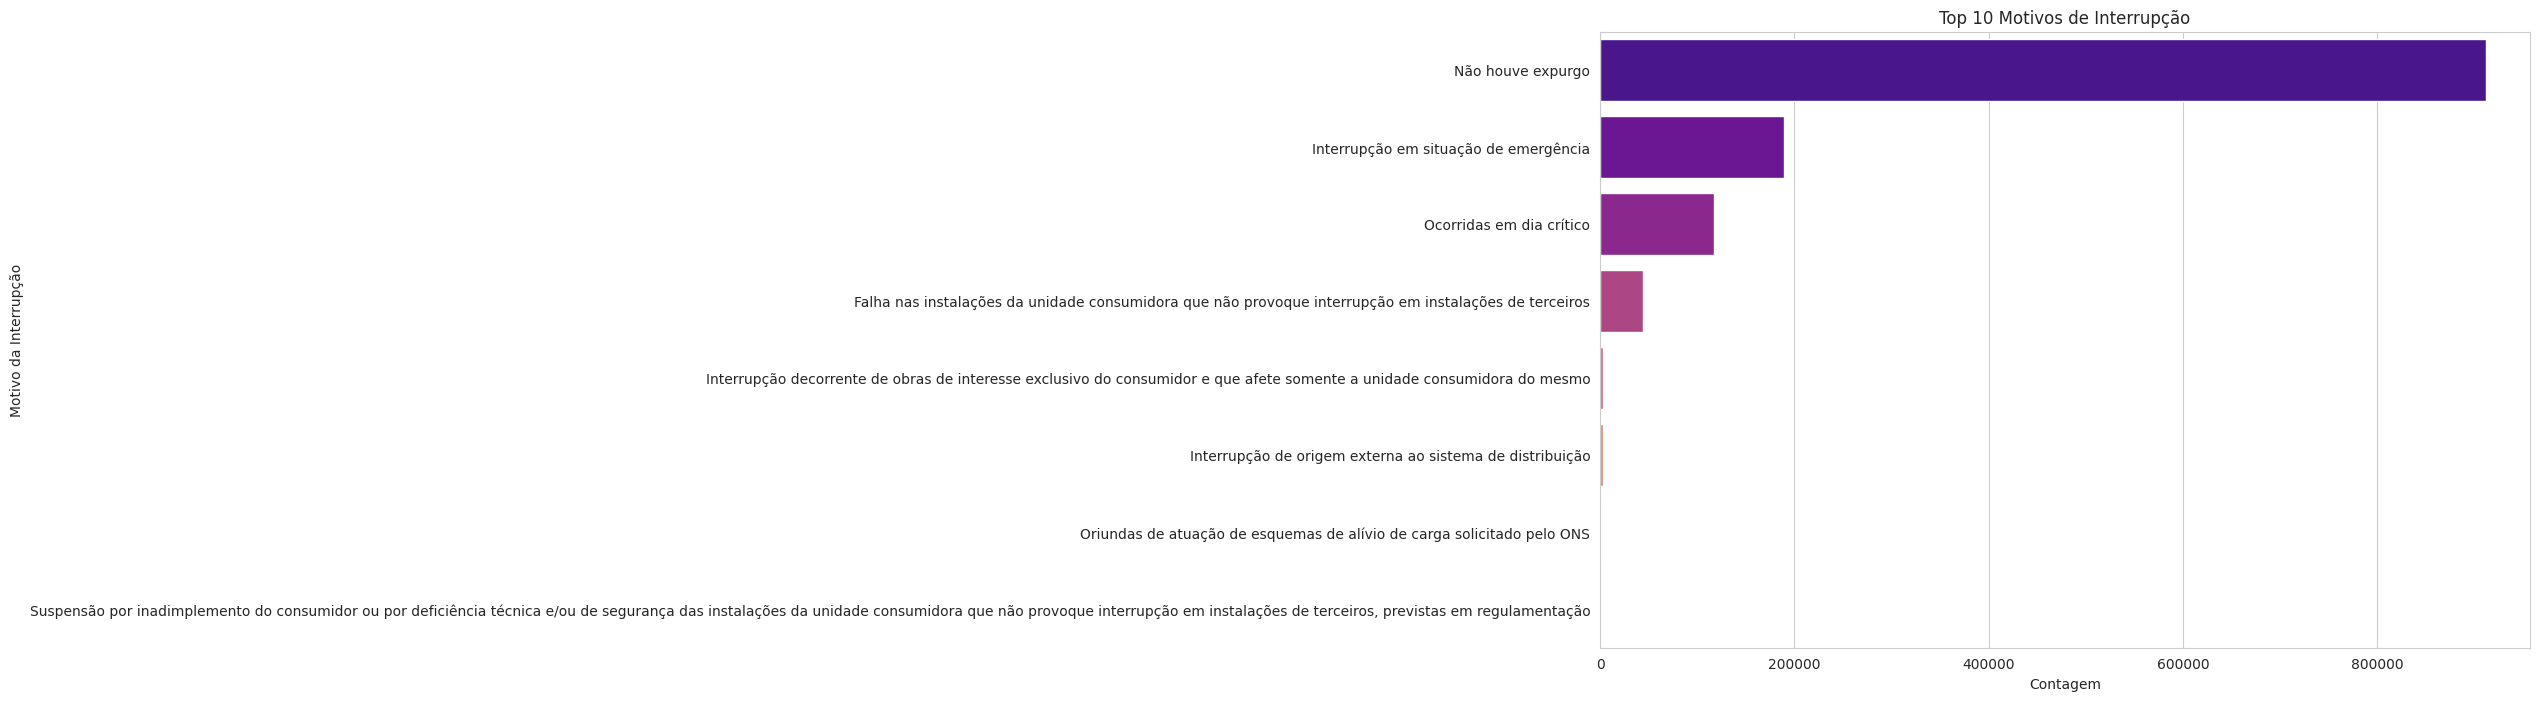

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="DscMotivoInterrupcao", order=df["DscMotivoInterrupcao"].value_counts().head(10).index, palette="plasma")
plt.title("Top 10 Motivos de Interrupção")
plt.xlabel("Contagem")
plt.ylabel("Motivo da Interrupção")
plt.show()

**Análise:**

*   **Tipo de Interrupção:** O gráfico de barras para `DscTipoInterrupcao` confirma a predominância de interrupções "Não Programadas", o que é um ponto crítico para a qualidade do serviço e indica a necessidade de focar na análise das causas dessas interrupções inesperadas.
*   **Motivos de Interrupção:** O gráfico dos top 10 motivos de interrupção, agora com descrições textuais claras, revela que "Não houve expurgo" é o motivo mais frequente, seguido por "Interrupção em situação de emergência" e "Ocorridas em dia crítico".

Contextualização da classificação "Não houve expurgo":
* Interrupções causadas por falhas na rede devido a manutenção inadequada ou negligência da distribuidora;
* Interrupções que ocorrem com frequência e que poderiam ter sido evitadas com medidas preventivas.

/tmp/ipython-input-13-794239909.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["NumNivelTensao"], kde=True, palette="coolwarm")


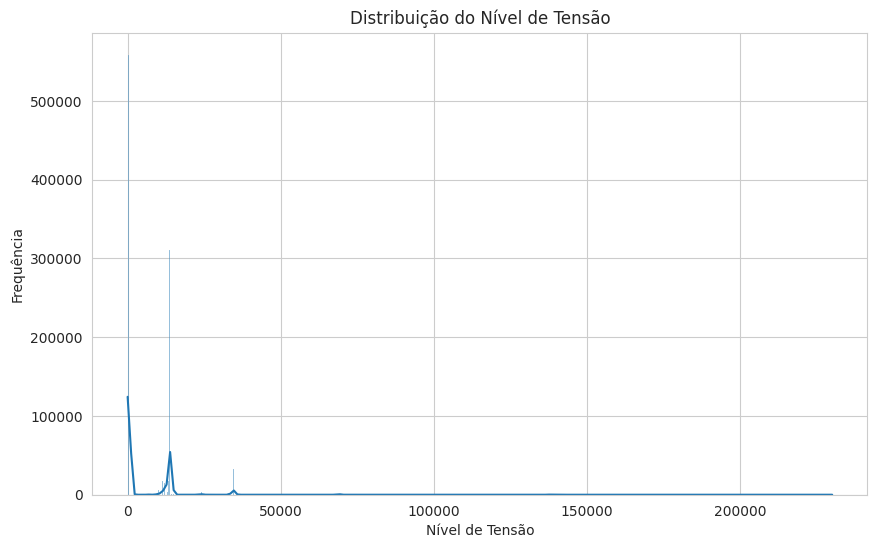

In [13]:
### 5.2. Distribuição de Atributos Numéricos

plt.figure(figsize=(10, 6))
sns.histplot(df["NumNivelTensao"], kde=True, palette="coolwarm")
plt.title("Distribuição do Nível de Tensão")
plt.xlabel("Nível de Tensão")
plt.ylabel("Frequência")
plt.show()

/tmp/ipython-input-14-3034637549.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[df["NumConsumidorConjunto"] > 0]["NumConsumidorConjunto"], bins=50, kde=True, palette="magma")


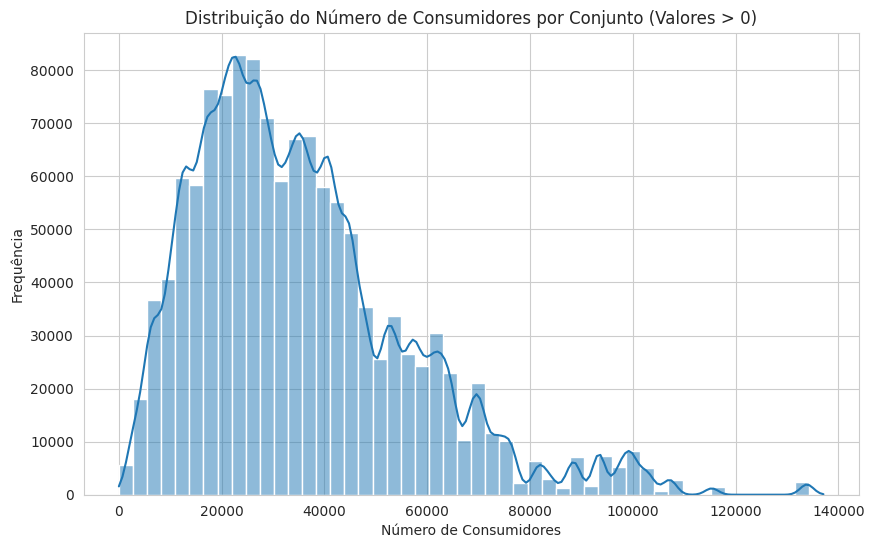

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["NumConsumidorConjunto"] > 0]["NumConsumidorConjunto"], bins=50, kde=True, palette="magma")
plt.title("Distribuição do Número de Consumidores por Conjunto (Valores > 0)")
plt.xlabel("Número de Consumidores")
plt.ylabel("Frequência")
plt.show()

/tmp/ipython-input-15-2817711494.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["DuracaoInterrupcaoMinutos"].dropna(), bins=50, kde=True, palette="viridis")


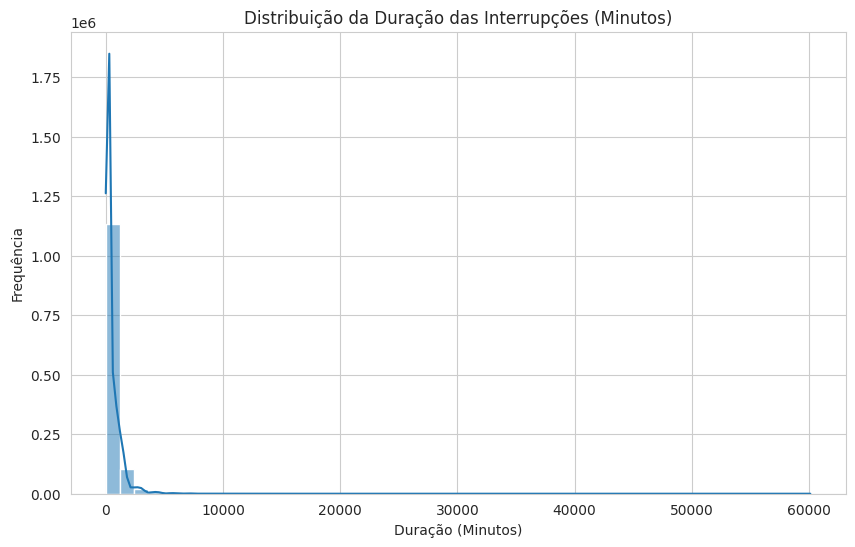

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df["DuracaoInterrupcaoMinutos"].dropna(), bins=50, kde=True, palette="viridis")
plt.title("Distribuição da Duração das Interrupções (Minutos)")
plt.xlabel("Duração (Minutos)")
plt.ylabel("Frequência")
plt.show()


**Análise:**

*   **Nível de Tensão:** A distribuição do `NumNivelTensao` pode indicar os níveis de tensão mais afetados por interrupções, o que pode guiar a manutenção e o planejamento da rede.
*   **Número de Consumidores por Conjunto:** A distribuição do `NumConsumidorConjunto` (para valores > 0) mostra que a maioria das interrupções afeta um número relativamente pequeno de consumidores, mas existem casos de interrupções que impactam um grande número de consumidores, o que merece atenção especial.
*   **Duração das Interrupções:** A distribuição da `DuracaoInterrupcaoMinutos` mostra que a maioria das interrupções tem uma duração curta, mas há uma cauda longa indicando interrupções de longa duração. Isso reforça a importância de investigar as causas das interrupções mais longas.


### 5.3. Análise de Sazonalidade e Relações entre Variáveis


/tmp/ipython-input-16-977476943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="MesInterrupcao", palette="viridis")


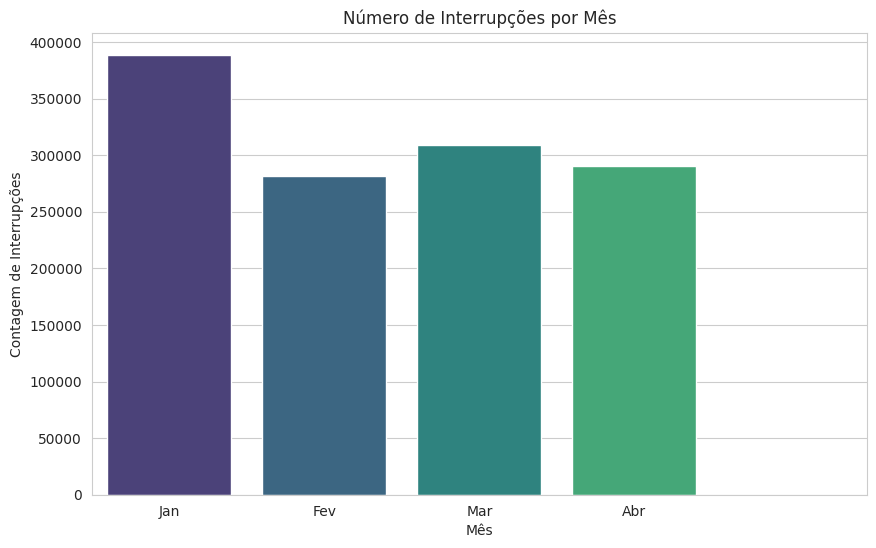

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="MesInterrupcao", palette="viridis")
plt.title("Número de Interrupções por Mês")
plt.xlabel("Mês")
plt.ylabel("Contagem de Interrupções")
plt.xticks(ticks=range(0,4), labels=["Jan", "Fev", "Mar", "Abr"])
plt.show()

/tmp/ipython-input-17-1987932287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DiaSemanaInterrupcao", palette="magma")


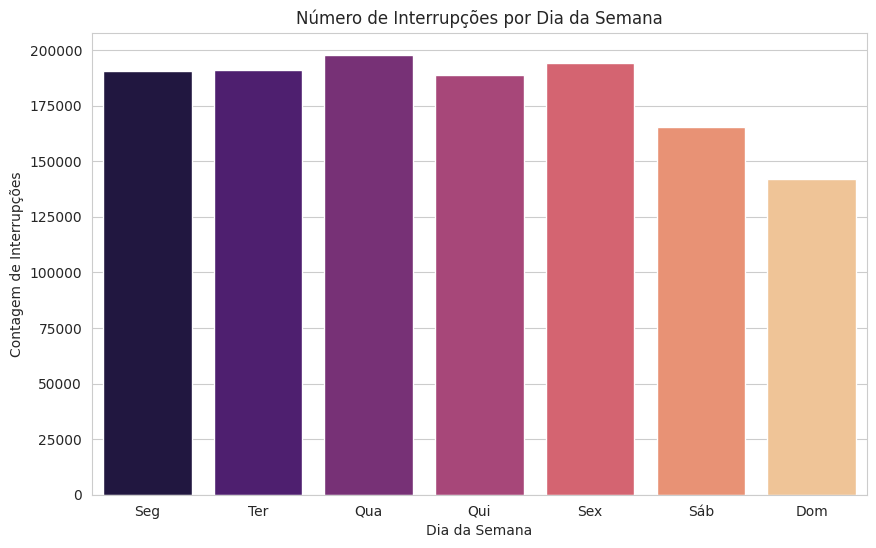

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="DiaSemanaInterrupcao", palette="magma")
plt.title("Número de Interrupções por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Contagem de Interrupções")
plt.xticks(ticks=range(0,7), labels=["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"])
plt.show()

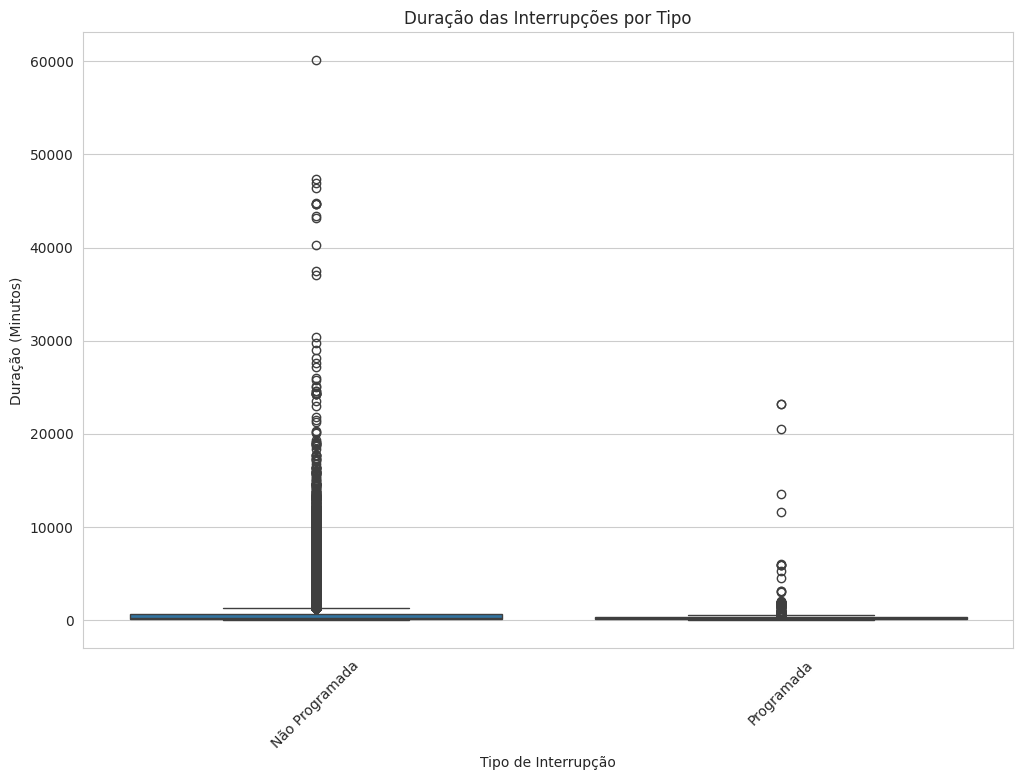

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="DscTipoInterrupcao", y="DuracaoInterrupcaoMinutos")
plt.title("Duração das Interrupções por Tipo")
plt.xlabel("Tipo de Interrupção")
plt.ylabel("Duração (Minutos)")
plt.xticks(rotation=45)
plt.show()

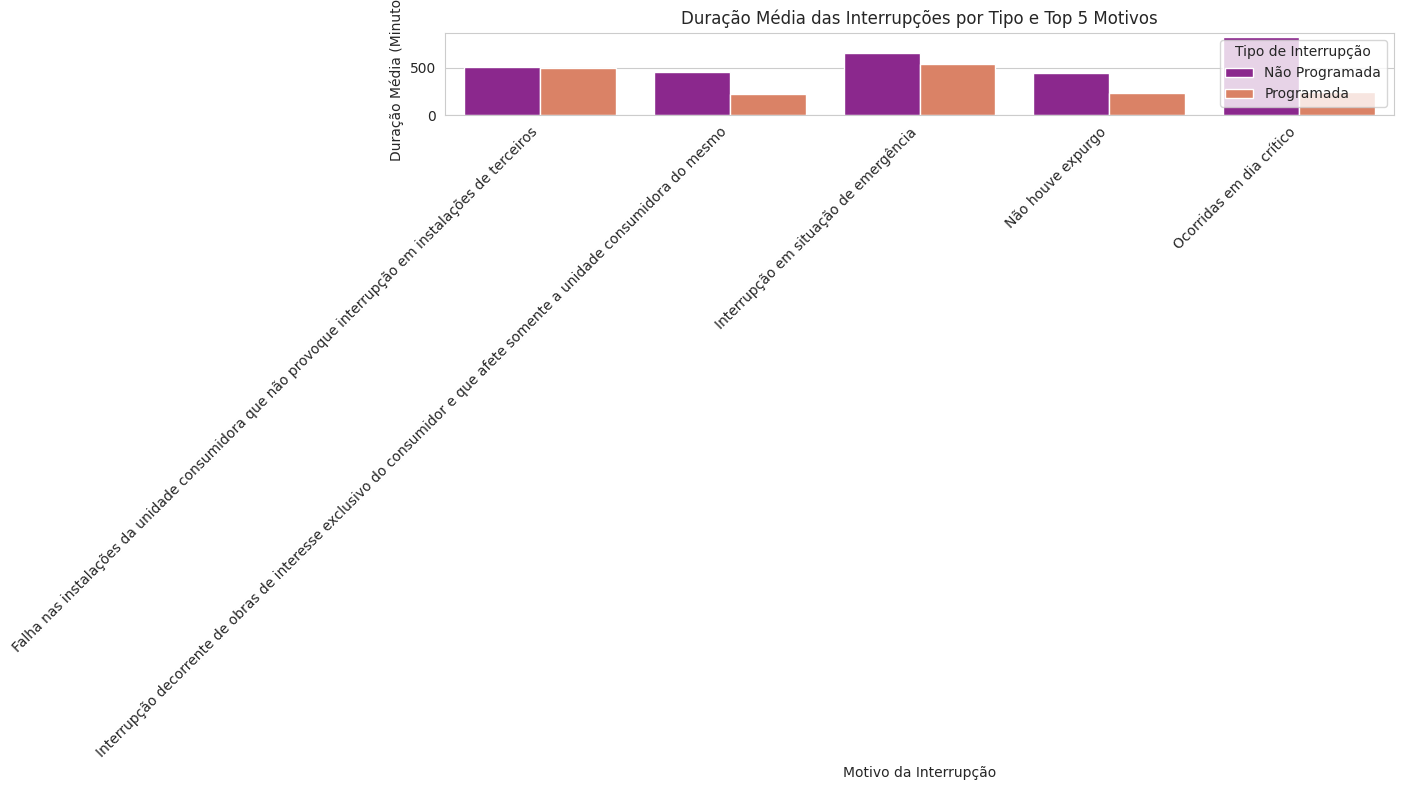

In [19]:
plt.figure(figsize=(14, 8))
mean_duration_by_type_motive = df.groupby(["DscTipoInterrupcao", "DscMotivoInterrupcao"])["DuracaoInterrupcaoMinutos"].mean().reset_index()
top_motives = df["DscMotivoInterrupcao"].value_counts().head(5).index
mean_duration_by_type_motive = mean_duration_by_type_motive[mean_duration_by_type_motive["DscMotivoInterrupcao"].isin(top_motives)]
sns.barplot(data=mean_duration_by_type_motive, x="DscMotivoInterrupcao", y="DuracaoInterrupcaoMinutos", hue="DscTipoInterrupcao", palette="plasma")
plt.title("Duração Média das Interrupções por Tipo e Top 5 Motivos")
plt.xlabel("Motivo da Interrupção")
plt.ylabel("Duração Média (Minutos)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de Interrupção")
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-168975465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="DscTipoInterrupcao", y="NumConsumidorConjunto", palette="coolwarm")


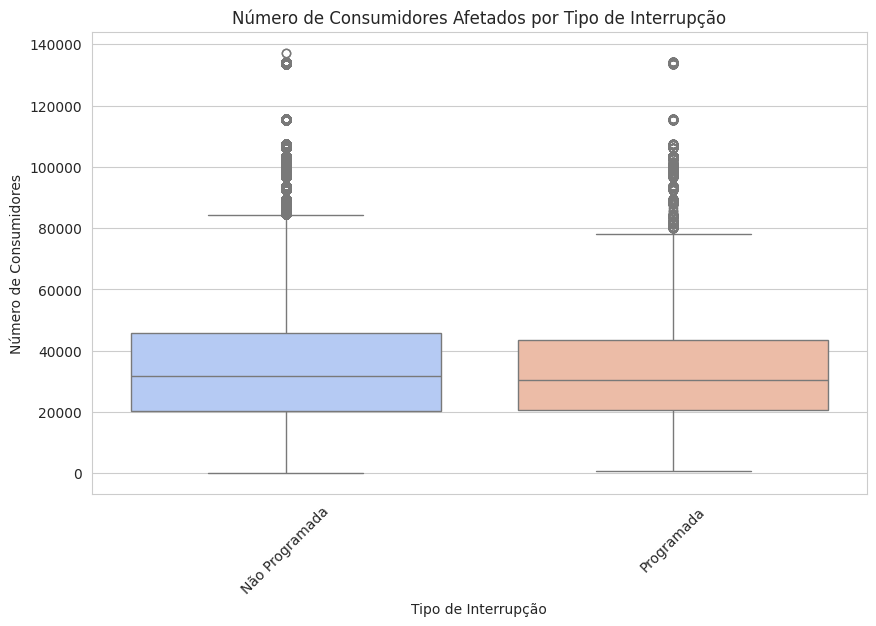

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="DscTipoInterrupcao", y="NumConsumidorConjunto", palette="coolwarm")
plt.title("Número de Consumidores Afetados por Tipo de Interrupção")
plt.xlabel("Tipo de Interrupção")
plt.ylabel("Número de Consumidores")
plt.xticks(rotation=45)
plt.show()

**Análise:**

*   **Interrupções por Mês e Dia da Semana:** A análise da sazonalidade por mês e dia da semana pode revelar padrões importantes, como picos em determinados períodos que podem estar relacionados a fatores climáticos ou operacionais. Isso é crucial para o planejamento de recursos e ações preventivas.
*   **Duração das Interrupções por Tipo:** O boxplot da duração por tipo de interrupção mostra que interrupções não programadas tendem a ter uma variabilidade maior e, em alguns casos, durações mais longas, reforçando a necessidade de foco nessas ocorrências.
*   **Duração Média por Tipo e Motivo:** Este gráfico é fundamental para identificar as combinações de tipo e motivo que resultam nas interrupções mais longas, permitindo que a concessionária priorize a resolução dessas causas específicas.
*   **Consumidores Afetados por Tipo de Interrupção:** O boxplot do número de consumidores afetados por tipo de interrupção destaca o impacto das interrupções não programadas, que podem afetar um número significativamente maior de consumidores, exigindo uma resposta rápida para minimizar o transtorno.


## 6. Conclusão

A análise e pré-processamento do dataset de interrupções de energia elétrica revelaram padrões importantes e insights valiosos para a melhoria da qualidade do serviço. Esté trabalho demonstrou a capacidade de:

*   **Processar e limpar dados:** Lidando com valores faltantes, convertendo tipos de dados e criando novas features relevantes.
*   **Identificar os principais tipos e motivos de interrupção:** Com destaque para as interrupções não programadas e os motivos mais frequentes.
*   **Analisar a sazonalidade e o impacto:** Compreendendo a duração das interrupções e o número de consumidores afetados em diferentes cenários.

As hipóteses levantadas foram exploradas e validadas através das análises e visualizações. O dataset, após o pré-processamento, está apto para futuras modelagens preditivas ou análises mais aprofundadas, como a identificação de áreas geográficas mais afetadas ou a previsão de falhas.
